In [1]:
from TwinNeuralNetwork import TNNR, ANNR
import matplotlib.pyplot as plt

import numpy as np

In [2]:
def_func = lambda a: lambda x: x**3 - a*x

In [6]:
%%time

n = 360
seed = 2490234

for experiment in range(8):
    
    rmses = []
    
    for a in np.arange(-10, 201, 10):

        tnnr_64 = TNNR(def_func(a), n=n, seed=seed, inverse_problem=True,
                       show_summary=False, show_loss_plot=False, show_rmse=False, 
                   mdl_wts_file='weights/tnnr64_n' + str(n) + '_inverse_a' + str(a))
        annr_64 = ANNR(def_func(a), n=n, seed=seed, inverse_problem=True,
                       show_summary=False, show_loss_plot=False, show_rmse=False, 
                   mdl_wts_file='weights/annr64_n' + str(n) + '_inverse_a' + str(a))

        tnnr_128 = TNNR(def_func(a), n=n, seed=seed, neurons=128, inverse_problem=True,
                        show_summary=False, show_loss_plot=False, show_rmse=False, 
                   mdl_wts_file='weights/tnnr128_n' + str(n) + '_inverse_a' + str(a))
        annr_128 = ANNR(def_func(a), n=n, seed=seed, neurons=128, inverse_problem=True,
                        show_summary=False, show_loss_plot=False, show_rmse=False, 
                   mdl_wts_file='weights/annr128_n' + str(n) + '_inverse_a' + str(a))

        rmses.append([tnnr_64.rmse_test, annr_64.rmse_test, tnnr_128.rmse_test, annr_128.rmse_test])
        
        seed += 789
        
    with open("rmses2_" + str(experiment) + ".txt", "w") as file:
        file.write(str(rmses))
        
    seed += 23406

CPU times: user 13h 5min 42s, sys: 3h 14min 25s, total: 16h 20min 7s
Wall time: 10h 43min 59s


In [ ]:
start  12:23  lunes
end    23:06  lunes

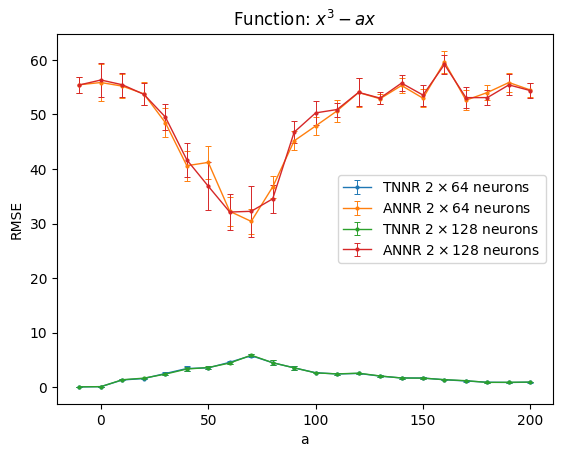

In [16]:
rmses_tnnr_64 = []
rmses_annr_64 = []
rmses_tnnr_128 = []
rmses_annr_128 = []

for experiment in range(8):
    
    with open("rmses2_" + str(experiment) + ".txt", "r") as file:
        rmses = eval(file.readline())

    rmses_tnnr_64.append(np.array(rmses)[:,0])
    rmses_annr_64.append(np.array(rmses)[:,1])
    rmses_tnnr_128.append(np.array(rmses)[:,2])
    rmses_annr_128.append(np.array(rmses)[:,3])
    
means_tnnr_64 = np.mean(rmses_tnnr_64, axis=0)
means_annr_64 = np.mean(rmses_annr_64, axis=0)
means_tnnr_128 = np.mean(rmses_tnnr_128, axis=0)
means_annr_128 = np.mean(rmses_annr_128, axis=0)

stds_tnnr_64 = np.std(rmses_tnnr_64, axis=0)/np.sqrt(8 - 1)
stds_annr_64 = np.std(rmses_annr_64, axis=0)/np.sqrt(8 - 1)
stds_tnnr_128 = np.std(rmses_tnnr_128, axis=0)/np.sqrt(8 - 1)
stds_annr_128 = np.std(rmses_annr_128, axis=0)/np.sqrt(8 - 1)


plt.errorbar(np.arange(-10, 201, 10), means_tnnr_64, yerr=stds_tnnr_64, label='TNNR $2\\times 64$ neurons',
             marker='o', ms=2, ls='-', lw=1, elinewidth=0.7, capsize=2, capthick=0.7)
plt.errorbar(np.arange(-10, 201, 10), means_annr_64, yerr=stds_annr_64, label='ANNR $2\\times 64$ neurons',
             marker='o', ms=2, ls='-', lw=1, elinewidth=0.7, capsize=2, capthick=0.7)
plt.errorbar(np.arange(-10, 201, 10), means_tnnr_128, yerr=stds_tnnr_128, label='TNNR $2\\times 128$ neurons',
             marker='o', ms=2, ls='-', lw=1, elinewidth=0.7, capsize=2, capthick=0.7)
plt.errorbar(np.arange(-10, 201, 10), means_annr_128, yerr=stds_annr_128, label='ANNR $2\\times 128$ neurons',
             marker='o', ms=2, ls='-', lw=1, elinewidth=0.7, capsize=2, capthick=0.7)
plt.title('Function: $x^3 - ax$')
plt.xlabel('a')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## $a=70$

In [17]:
%%time

n = 1000
seed = 9768

a = 70


tnnr_64 = TNNR(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.5,
               show_summary=False, show_loss_plot=False, show_rmse=False, 
           mdl_wts_file='weights/tnnr64_n' + str(n) + '_inverse_a' + str(a))
annr_64 = ANNR(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.5,
               show_summary=False, show_loss_plot=False, show_rmse=False, 
           mdl_wts_file='weights/annr64_n' + str(n) + '_inverse_a' + str(a))

tnnr_128 = TNNR(def_func(a), n=n, seed=seed, neurons=128, inverse_problem=True, test_pct=0.5,
                show_summary=False, show_loss_plot=False, show_rmse=False, 
           mdl_wts_file='weights/tnnr128_n' + str(n) + '_inverse_a' + str(a))
annr_128 = ANNR(def_func(a), n=n, seed=seed, neurons=128, inverse_problem=True, test_pct=0.5,
                show_summary=False, show_loss_plot=False, show_rmse=False, 
           mdl_wts_file='weights/annr128_n' + str(n) + '_inverse_a' + str(a))


print("RMSE of TNNR 64:", tnnr_64.rmse_test)
print("RMSE of ANNR 64:", annr_64.rmse_test)
print("RMSE of TNNR 128:", tnnr_128.rmse_test)
print("RMSE of ANNR 128:", annr_128.rmse_test)

RMSE of TNNR 64: 3.637902281986815
RMSE of ANNR 64: 214.46676367020783
RMSE of TNNR 128: 3.663372738914522
RMSE of ANNR 128: 209.49324890822473
CPU times: user 6min 29s, sys: 1min 21s, total: 7min 50s
Wall time: 4min 59s


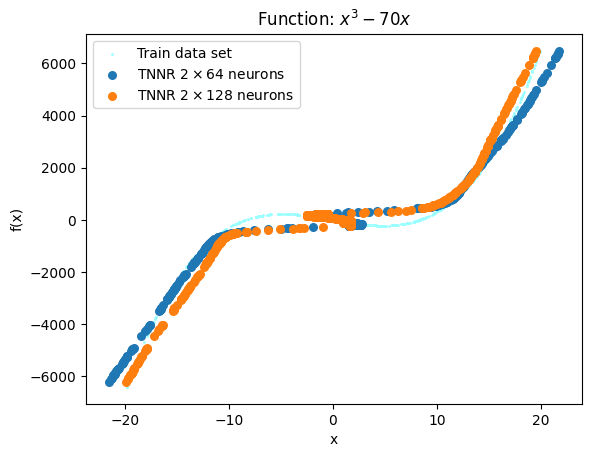

In [18]:
plt.scatter(tnnr_64.cn_transformer.inverse_transform_x(tnnr_64.x_train_single), 
            tnnr_64.cn_transformer.inverse_transform_y(tnnr_64.y_train_single),
            label='Train data set', s=1, c='#99ffff')
plt.scatter(tnnr_64.x_pred_test,
            tnnr_64.cn_transformer.inverse_transform_y(tnnr_64.y_test_single),
            label='TNNR $2\\times 64$ neurons', s=30)
plt.scatter(tnnr_128.x_pred_test,
            tnnr_128.cn_transformer.inverse_transform_y(tnnr_128.y_test_single),
            label='TNNR $2\\times 128$ neurons', s=30)

plt.title('Function: $x^3 - 70x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

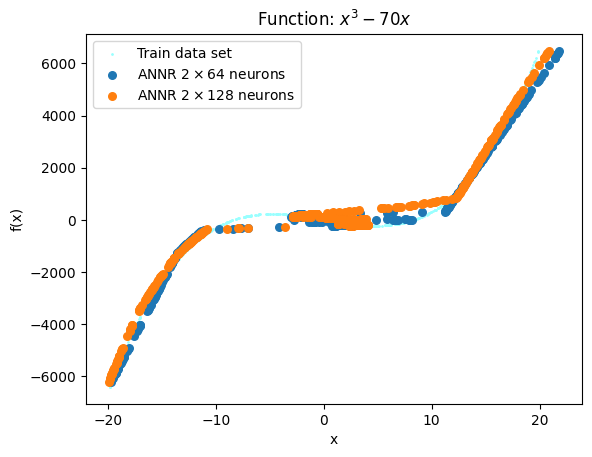

In [19]:
plt.scatter(annr_64.cn_transformer.inverse_transform_x(annr_64.x_train_single), 
            annr_64.cn_transformer.inverse_transform_y(annr_64.y_train_single),
            label='Train data set', s=1, c='#99ffff')
plt.scatter(annr_64.x_pred_test,
            annr_64.cn_transformer.inverse_transform_y(annr_64.y_test_single),
            label='ANNR $2\\times 64$ neurons', s=30)
plt.scatter(annr_128.x_pred_test,
            annr_128.cn_transformer.inverse_transform_y(annr_128.y_test_single),
            label='ANNR $2\\times 128$ neurons', s=30)

plt.title('Function: $x^3 - 70x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

## $a=140$

In [29]:
%%time

n = 1000
seed = 9492

a = 140


tnnr_64 = TNNR(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.5,
               show_summary=False, show_loss_plot=False, show_rmse=False, 
           mdl_wts_file='weights/tnnr64_n' + str(n) + '_inverse_a' + str(a))
annr_64 = ANNR(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.5,
               show_summary=False, show_loss_plot=False, show_rmse=False, 
           mdl_wts_file='weights/annr64_n' + str(n) + '_inverse_a' + str(a))

tnnr_128 = TNNR(def_func(a), n=n, seed=seed, neurons=128, inverse_problem=True, test_pct=0.5,
                show_summary=False, show_loss_plot=False, show_rmse=False, 
           mdl_wts_file='weights/tnnr128_n' + str(n) + '_inverse_a' + str(a))
annr_128 = ANNR(def_func(a), n=n, seed=seed, neurons=128, inverse_problem=True, test_pct=0.5,
                show_summary=False, show_loss_plot=False, show_rmse=False, 
           mdl_wts_file='weights/annr128_n' + str(n) + '_inverse_a' + str(a))


print("RMSE of TNNR 64:", tnnr_64.rmse_test)
print("RMSE of ANNR 64:", annr_64.rmse_test)
print("RMSE of TNNR 128:", tnnr_128.rmse_test)
print("RMSE of ANNR 128:", annr_128.rmse_test)

RMSE of TNNR 64: 5.98821806820778
RMSE of ANNR 64: 204.07473508695716
RMSE of TNNR 128: 5.9766508389324615
RMSE of ANNR 128: 198.74945768662948
CPU times: user 12min 44s, sys: 3min 3s, total: 15min 48s
Wall time: 9min 34s


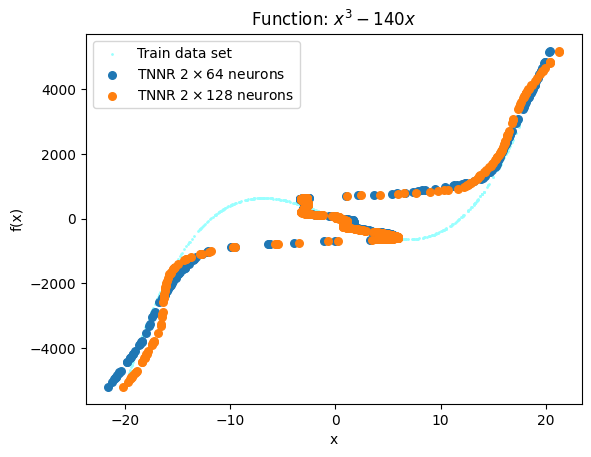

In [30]:
plt.scatter(tnnr_64.cn_transformer.inverse_transform_x(tnnr_64.x_train_single), 
            tnnr_64.cn_transformer.inverse_transform_y(tnnr_64.y_train_single),
            label='Train data set', s=1, c='#99ffff')
plt.scatter(tnnr_64.x_pred_test,
            tnnr_64.cn_transformer.inverse_transform_y(tnnr_64.y_test_single),
            label='TNNR $2\\times 64$ neurons', s=30)
plt.scatter(tnnr_128.x_pred_test,
            tnnr_128.cn_transformer.inverse_transform_y(tnnr_128.y_test_single),
            label='TNNR $2\\times 128$ neurons', s=30)

plt.title('Function: $x^3 - 140x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

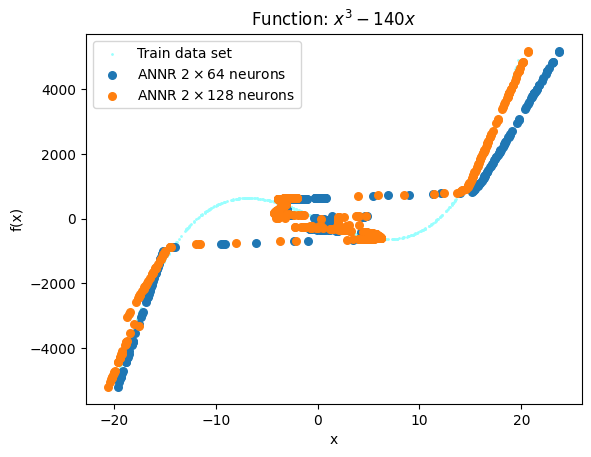

In [31]:
plt.scatter(annr_64.cn_transformer.inverse_transform_x(annr_64.x_train_single), 
            annr_64.cn_transformer.inverse_transform_y(annr_64.y_train_single),
            label='Train data set', s=1, c='#99ffff')
plt.scatter(annr_64.x_pred_test,
            annr_64.cn_transformer.inverse_transform_y(annr_64.y_test_single),
            label='ANNR $2\\times 64$ neurons', s=30)
plt.scatter(annr_128.x_pred_test,
            annr_128.cn_transformer.inverse_transform_y(annr_128.y_test_single),
            label='ANNR $2\\times 128$ neurons', s=30)

plt.title('Function: $x^3 - 140x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

## $a=70$

In [32]:
%%time

n = 360
seed = 94561

a = 70


tnnr_64 = TNNR(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.05,
               show_summary=False, show_loss_plot=False, show_rmse=False, 
           mdl_wts_file='weights/tnnr64_n' + str(n) + '_inverse_a' + str(a))
annr_64 = ANNR(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.05,
               show_summary=False, show_loss_plot=False, show_rmse=False, 
           mdl_wts_file='weights/annr64_n' + str(n) + '_inverse_a' + str(a))

tnnr_128 = TNNR(def_func(a), n=n, seed=seed, neurons=128, inverse_problem=True, test_pct=0.05,
                show_summary=False, show_loss_plot=False, show_rmse=False, 
           mdl_wts_file='weights/tnnr128_n' + str(n) + '_inverse_a' + str(a))
annr_128 = ANNR(def_func(a), n=n, seed=seed, neurons=128, inverse_problem=True, test_pct=0.05,
                show_summary=False, show_loss_plot=False, show_rmse=False, 
           mdl_wts_file='weights/annr128_n' + str(n) + '_inverse_a' + str(a))


print("RMSE of TNNR 64:", tnnr_64.rmse_test)
print("RMSE of ANNR 64:", annr_64.rmse_test)
print("RMSE of TNNR 128:", tnnr_128.rmse_test)
print("RMSE of ANNR 128:", annr_128.rmse_test)

RMSE of TNNR 64: 3.1623301094187153
RMSE of ANNR 64: 130.29876362178075
RMSE of TNNR 128: 2.7621599109457367
RMSE of ANNR 128: 132.16460781241818
CPU times: user 5min 22s, sys: 1min 25s, total: 6min 48s
Wall time: 3min 54s


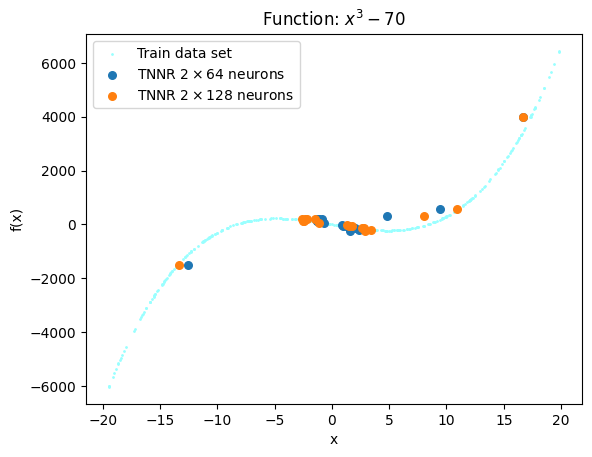

In [33]:
plt.scatter(tnnr_64.cn_transformer.inverse_transform_x(tnnr_64.x_train_single), 
            tnnr_64.cn_transformer.inverse_transform_y(tnnr_64.y_train_single),
            label='Train data set', s=1, c='#99ffff')
plt.scatter(tnnr_64.x_pred_test,
            tnnr_64.cn_transformer.inverse_transform_y(tnnr_64.y_test_single),
            label='TNNR $2\\times 64$ neurons', s=30)
plt.scatter(tnnr_128.x_pred_test,
            tnnr_128.cn_transformer.inverse_transform_y(tnnr_128.y_test_single),
            label='TNNR $2\\times 128$ neurons', s=30)

plt.title('Function: $x^3 - 70$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

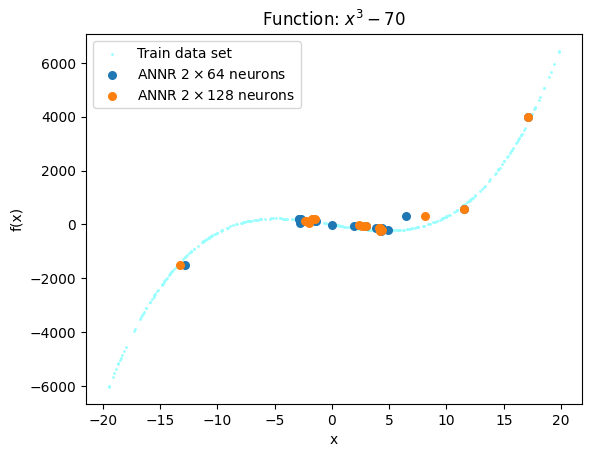

In [34]:
plt.scatter(annr_64.cn_transformer.inverse_transform_x(annr_64.x_train_single), 
            annr_64.cn_transformer.inverse_transform_y(annr_64.y_train_single),
            label='Train data set', s=1, c='#99ffff')
plt.scatter(annr_64.x_pred_test,
            annr_64.cn_transformer.inverse_transform_y(annr_64.y_test_single),
            label='ANNR $2\\times 64$ neurons', s=30)
plt.scatter(annr_128.x_pred_test,
            annr_128.cn_transformer.inverse_transform_y(annr_128.y_test_single),
            label='ANNR $2\\times 128$ neurons', s=30)

plt.title('Function: $x^3 - 70$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()